# Abdi Bimantara 09011381722100
# Implementasi Neural Network dalam mendeteksi Penyakit Jantung 

Penyakit jantung (Hananta & Muhammad, 2011) adalah terjadinya terganggunya keseimbangan antara suplai dan kebutuhan darah yang terjadi akibat penyumbatan pembuluh darah. Kematian akibat penyakit jantung mencapai 959.227 pasien, yakni 41,4 % dari seluruh kematian atau setiap hari 2600 penduduk meninggal akibat penyakit jantung (Hananta & Muhammad, 2011).

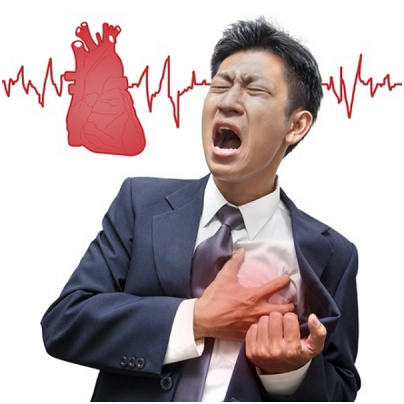

# Dataset
Dalam penelitian ini menggunakan data pasien yang melakukan pemeriksaaan penyakit jantung yang didapat dari UCI (Universitas
California, Invene) Machine Learning Repository (Janosi & Steinbrunn, 2011). Penelitian ini adalah penelitian experiment
yang melibatkan penyelidikan tentang perlakuan pada parameter dan variabel yang semuanya tergantung pada peneliti itu sendiri.

#### Dataset tersebut memiliki 13 anggota dengan 1 parameter Output
1. Age (Umur)
2. Sex (Jenis kelamin 0=Perempuan, 1=laki-laki)
3. ChestPain ( Jenis sakit dada )
4. Trestbps (tekanan darah dalam mmHg saat masuk ke rumah sakit)
5. Chol (Tingkat kolesterol dalam mg / dl)
6. Fbs (penyakit gula darah 0=Tidak 1= iya)
7. RestECG (hasil elektrokardiografi 0 = Normal, 1 = memiliki kelainan pada gelombang ST-T, 2 = menunjukkan kemungkinan Hipertrofi ventrikel kiri)
8. thalach( denyut jantung maksimum )
9. ExAng (exercise induced angina 1 = iya, 0 = tidak) 
10. Oldpeak (ST DEPRESSION)
11. Slope (kemiringan segmen puncak ST, 1: miring ke atas, 2: datar, 3: miring ke bawah)
12. Ca (jumlah pembuluh utama (0-3) diwarnai oleh flourosopy)
13. Thal (3 = normal; 6 = cacat; 7 = cacat reversibel)
14. Target (0 = belum sakit, 1 = sakit)

# 1. Import Library
Langkah pertama yang kita lakukan adalah mengimport library yang akan kita gunakan.
### Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
### Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
### Library Sklearn 
digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
### Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
### Library Seaborn
sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi dataset

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


# 2. import Dataset
Dataset ini memiliki 14 kolom dan 1025 baris dengan 13 kolom sebagai features dan 1 kolom (target) sebagai label yang memiliki nilai 0 (belum sakit) dan 1 (sakit) 

In [2]:
dataset=pd.read_csv("jantung2.csv", delimiter=",")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 3. Mengecek apakah ada data kosong
Setelah kita mengimport dataset ada baiknya terlebih dahulu kita melakukan pegecekaan terhadap dataset kita, apakah data tersebih sudah bersih atau masih ada data kosong.

In [5]:
dataset.isnull().any().sum()

0

# 4. Visualisasi data

Untuk mengetahui berapa banyak persebaran data terhadap nilai 0 dan 1 maka kita perlu visualisasi agar lebih muda dipahami. Dengan bantuan library matplotlib dan seaborn

In [6]:
dataset.target.value_counts()

1    526
0    499
Name: target, dtype: int64

- Perintah diatas berfungsi untuk melihat jumlah data yang berlabel 1 (sakit) yakni sebanyak 526 sedangkan data yang berlabel 0 (Belum sakit) sebanyak 499.
- Sedangkan pada perintah dibawah ini berfugsi untuk menampilkan jumlah data yang dihasilkan pada perintah diatas dalam bentuk Bar menggunakan bantuan library seaborn 

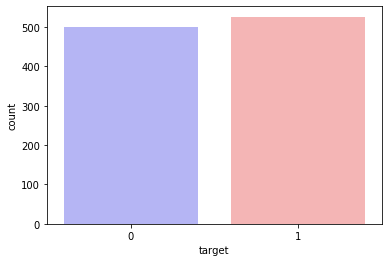

In [7]:
sns.countplot(x="target", data=dataset, palette="bwr")
plt.show()

In [8]:
belumkenapenyakit = len(dataset[dataset.target == 0])
kenapenyakit = len(dataset[dataset.target == 1])
print("Persentase pasien yang belum terkena penyakit jantung : {:.2f}%".format((belumkenapenyakit / (len(dataset.target))*100)))
print("Persentase pasien yang terkena penyakit jantung : {:.2f}%".format((kenapenyakit / (len(dataset.target))*100)))

Persentase pasien yang belum terkena penyakit jantung : 48.68%
Persentase pasien yang terkena penyakit jantung : 51.32%


- terlihat jumlah data pasien dimana 48.68 % pasien dinyatakan belum sakit dan 51.32 % data dinyatakan positif terkena sakit jantung.
- Sedangkan pada grafik bar dibawah juga terlihat jumlah data bersdasarkan jenis kelammin,dimana pada dataset ini data jenis kelamin laki-laki lebih banyak ketimbang data jenis kelamin perempuan

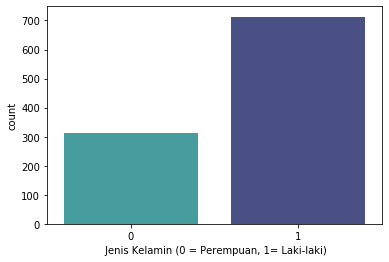

In [9]:
sns.countplot(x='sex', data=dataset, palette="mako_r")
plt.xlabel(" Jenis Kelamin (0 = Perempuan, 1= Laki-laki)")
plt.show()

In [10]:
Perempuan = len(dataset[dataset.sex == 0])
Laki_Laki = len(dataset[dataset.sex == 1])
print("Persentase jumlah pasien Perempuan : {:.2f}%".format((Perempuan / (len(dataset.sex))*100)))
print("Persentase jumlah pasien Laki-laki : {:.2f}%".format((Laki_Laki / (len(dataset.sex))*100)))

Persentase jumlah pasien Perempuan : 30.44%
Persentase jumlah pasien Laki-laki : 69.56%


- Jika berdasarkan jenis kelamin, jumlah pasien Perempuan (30.44%) lebih sedikit ketimbang jumlah pasien Laki-laki (69.56%)
- Jika berdasrkan umur maka jumlah pasien yang positif terkena penyakit jantung paling banyak saat umur 57 - 62 tahun

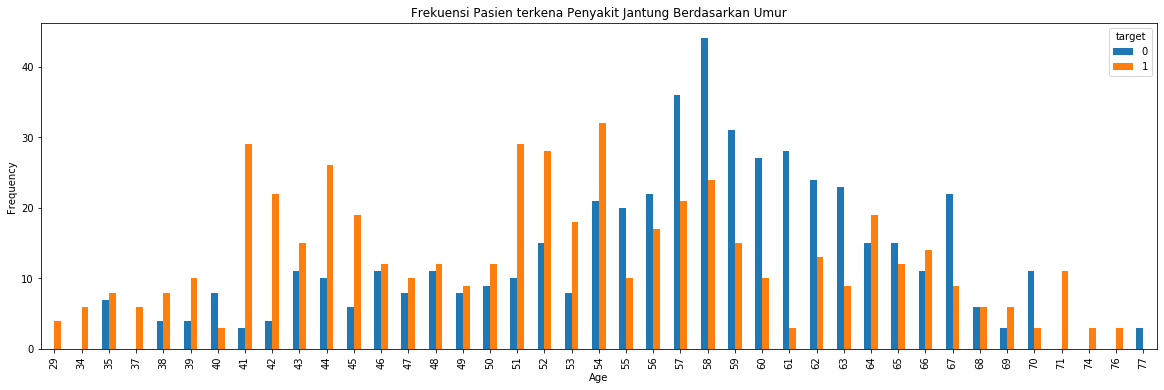

In [11]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Pasien terkena Penyakit Jantung Berdasarkan Umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

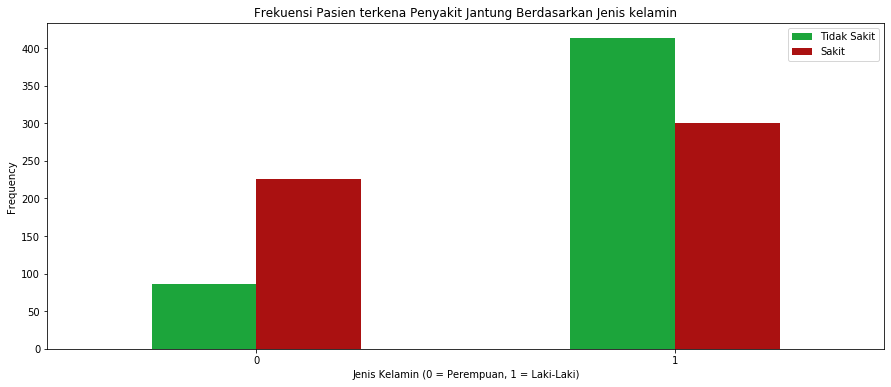

In [12]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi Pasien terkena Penyakit Jantung Berdasarkan Jenis kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-Laki)')
plt.xticks(rotation=0)
plt.legend(["Tidak Sakit", "Sakit"])
plt.ylabel('Frequency')
plt.show()

- Terlihat dari tabel diatas menunjukkan bahwa jenis kelamin perempuan tingkat resiko terkena penyakit jantung lebih tinggi ketimbang pasien laki-laki
- sedangkan untuk gambra dibawah terlihat persebaran data pasien yang positif sakit dan belum sakit dengan banttuna scatter

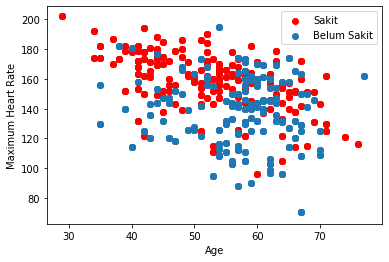

In [13]:
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["Sakit", "Belum Sakit"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

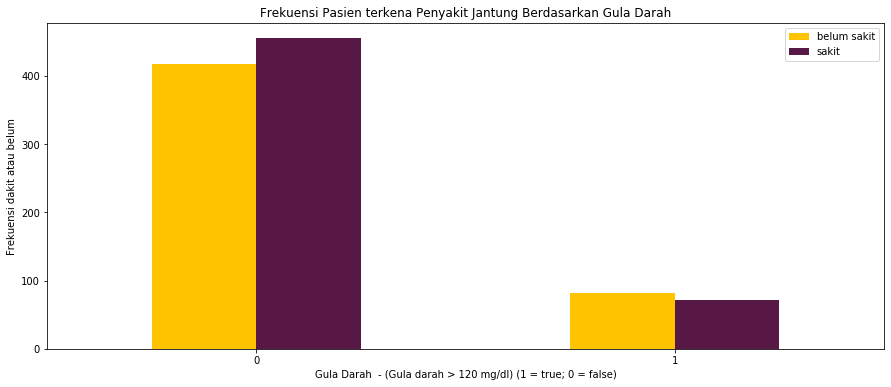

In [14]:
pd.crosstab(dataset.fbs,dataset.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Pasien terkena Penyakit Jantung Berdasarkan Gula Darah')
plt.xlabel('Gula Darah  - (Gula darah > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["belum sakit", "sakit"])
plt.ylabel('Frekuensi dakit atau belum')
plt.show()

- Berdasarkan datase pasien pada tabel diatas, dapat kita ketahui jika pasien perempuan memiliki resiko untuk terkena gula darah tinggi, 

# 5. Menentukan Features dan Labels
features dimulai dari kolom 1- 13 sedangkan untuk Lables sendiri kita ambil pada kolom terakhir yakni kolom 14

In [15]:
features = dataset.iloc[:,0:13].values
labels = dataset.iloc [:,13].values

# 6. Normalisasi
pada tahap ini kita menggunakan metode Normalisasi yaitu MinMaxScaler


In [16]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# 7. Splitting dan Modelling 

Pada tahap ini kita membuat file test berukuran 20 % dari jumlah keseluruhan data yang tersedia. 
    Selanjutnya kita membuat model NN dengan :
    - 50 hiden layer pertama dengan fungsi aktivasi relu 
    - 50 hiden layer kedua dengan fungsi aktivasi  relu
    - fungsi Droput digunakan untuk mensimulasikan sejumlah besar arsitektur jaringan yang berbeda dengan menurunkan node
      secara acak selama data di training sebesar 50%.
    - dan layer output (sakit atau tidak) dengan menggnunakan fungsi aktivasi sigmoid 

In [17]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [18]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

jika sudah menentukan model ann yang akan kita gunakan, langkah selanjutnya kita harus menyetting batch size (yang saya gunakan sebanyak 50), an nilai epoch (yang saya gunakan sebanyak 300)

In [19]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=50, epochs=300)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 820 samples, validate on 205 samples
Epoch 1/300
820/820 [==============================] - 0s 244us/step - loss: 0.6642 - accuracy: 0.6280 - val_loss: 0.6039 - val_accuracy: 0.7610
Epoch 2/300
820/820 [==============================] - 0s 49us/step - loss: 0.5957 - accuracy: 0.7354 - val_loss: 0.5430 - val_accuracy: 0.7951
Epoch 3/300
820/820 [==============================] - 0s 61us/step - loss: 0.5344 - accuracy: 0.7854 - val_loss: 0.4919 - val_accuracy: 0.7951
Epoch 4/300
820/820 [==============================] - 0s 49us/step - loss: 0.4915 - accuracy: 0.7854 - val_loss: 0.4474 - val_accuracy: 0.8000
Epoch 5/300
820/820 [==============================] - 0s 49us/step - loss: 0.4503 - accuracy: 0.8000 - val_loss: 0.4156 - val_accuracy: 0.8098
Epoch 6/300
820/820 [==============================] - 0s 49us/step - loss: 0.4222 - accuracy: 0.8098 - val_loss: 0.3977 - val_accuracy: 0.8195
Epoch 7/300
820/820 [==============================] - 0s 49us/step - loss: 0.4238 - accu

820/820 [==============================] - 0s 49us/step - loss: 0.1365 - accuracy: 0.9512 - val_loss: 0.1540 - val_accuracy: 0.9415
Epoch 114/300
820/820 [==============================] - 0s 49us/step - loss: 0.1254 - accuracy: 0.9622 - val_loss: 0.1481 - val_accuracy: 0.9512
Epoch 115/300
820/820 [==============================] - 0s 37us/step - loss: 0.1308 - accuracy: 0.9463 - val_loss: 0.1464 - val_accuracy: 0.9512
Epoch 116/300
820/820 [==============================] - 0s 37us/step - loss: 0.1249 - accuracy: 0.9561 - val_loss: 0.1483 - val_accuracy: 0.9463
Epoch 117/300
820/820 [==============================] - 0s 37us/step - loss: 0.1200 - accuracy: 0.9610 - val_loss: 0.1502 - val_accuracy: 0.9512
Epoch 118/300
820/820 [==============================] - 0s 49us/step - loss: 0.1244 - accuracy: 0.9573 - val_loss: 0.1421 - val_accuracy: 0.9512
Epoch 119/300
820/820 [==============================] - ETA: 0s - loss: 0.0907 - accuracy: 0.96 - 0s 37us/step - loss: 0.1226 - accuracy:

Epoch 169/300
820/820 [==============================] - 0s 37us/step - loss: 0.0658 - accuracy: 0.9805 - val_loss: 0.0783 - val_accuracy: 0.9805
Epoch 170/300
820/820 [==============================] - 0s 37us/step - loss: 0.0610 - accuracy: 0.9817 - val_loss: 0.0850 - val_accuracy: 0.9756
Epoch 171/300
820/820 [==============================] - 0s 37us/step - loss: 0.0717 - accuracy: 0.9829 - val_loss: 0.0898 - val_accuracy: 0.9512
Epoch 172/300
820/820 [==============================] - 0s 37us/step - loss: 0.0738 - accuracy: 0.9744 - val_loss: 0.0867 - val_accuracy: 0.9805
Epoch 173/300
820/820 [==============================] - 0s 37us/step - loss: 0.0631 - accuracy: 0.9768 - val_loss: 0.0732 - val_accuracy: 0.9854
Epoch 174/300
820/820 [==============================] - 0s 49us/step - loss: 0.0648 - accuracy: 0.9817 - val_loss: 0.0784 - val_accuracy: 0.9805
Epoch 175/300
820/820 [==============================] - 0s 37us/step - loss: 0.0662 - accuracy: 0.9768 - val_loss: 0.0738 -

820/820 [==============================] - 0s 49us/step - loss: 0.0172 - accuracy: 0.9988 - val_loss: 0.0230 - val_accuracy: 0.9902
Epoch 282/300
820/820 [==============================] - 0s 37us/step - loss: 0.0236 - accuracy: 0.9951 - val_loss: 0.0227 - val_accuracy: 0.9902
Epoch 283/300
820/820 [==============================] - 0s 49us/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0223 - val_accuracy: 0.9902
Epoch 284/300
820/820 [==============================] - 0s 37us/step - loss: 0.0209 - accuracy: 0.9963 - val_loss: 0.0238 - val_accuracy: 0.9902
Epoch 285/300
820/820 [==============================] - 0s 49us/step - loss: 0.0194 - accuracy: 0.9963 - val_loss: 0.0227 - val_accuracy: 0.9902
Epoch 286/300
820/820 [==============================] - 0s 37us/step - loss: 0.0174 - accuracy: 0.9976 - val_loss: 0.0222 - val_accuracy: 0.9902
Epoch 287/300
820/820 [==============================] - 0s 49us/step - loss: 0.0188 - accuracy: 0.9963 - val_loss: 0.0220 - val_accuracy:

Jika sudah menjalan codingan diatas. maka kita perlu mengetahuin tingkat akurasi dari proses training data, dan dapat kita ketahui tingkat akurasi yang dihasilkan pada proses trainig menghasilkan 99 %

In [20]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9902439117431641


In [21]:
acc_training.history

{'val_loss': [0.6039172585417585,
  0.5429929429438056,
  0.49185702350081467,
  0.44738992103716224,
  0.4155569272797282,
  0.3976645629580428,
  0.3878456430464256,
  0.37747088074684143,
  0.37478466877123207,
  0.3686140255957115,
  0.3669540725830125,
  0.36005301519138055,
  0.3573113930661504,
  0.3533859140262371,
  0.35071602590927264,
  0.350769546337244,
  0.34794575248549625,
  0.3459549335444846,
  0.3420487631384919,
  0.33940551829774207,
  0.33993287529887223,
  0.3349469253202764,
  0.3322118904169013,
  0.3333959539489048,
  0.32832261792770245,
  0.3290295818956887,
  0.3253147156863678,
  0.3297404345215821,
  0.3212618953207644,
  0.32222466316164994,
  0.31552867736758256,
  0.3125320967377686,
  0.30945629372102457,
  0.31157696537855195,
  0.3034964649052155,
  0.30510400162964335,
  0.3014926021782363,
  0.29843219533199217,
  0.29748619820286587,
  0.29315872326856707,
  0.28997232510549265,
  0.2940935534311504,
  0.28590941283761,
  0.2845940987874822,
  0.

# 8. Plotting Model Akurasi dan Loss Akurasi

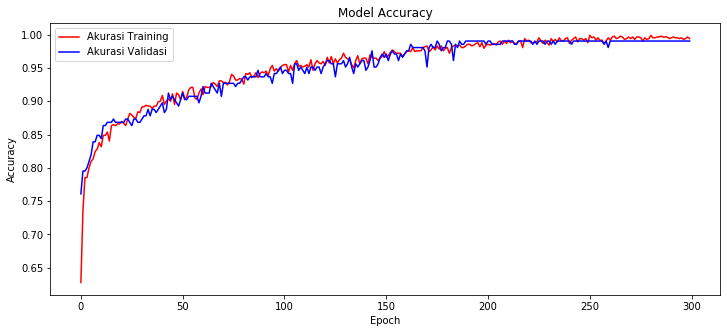

In [22]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

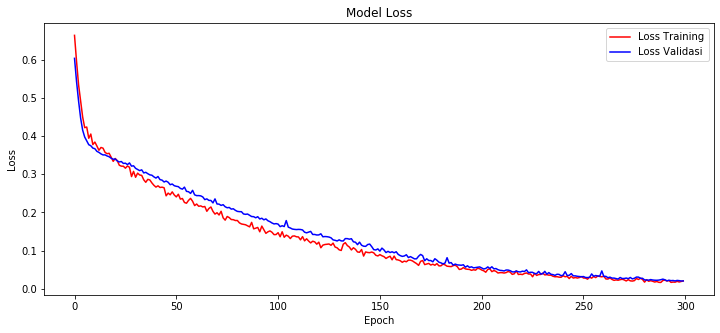

In [23]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [24]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [25]:
training_predicted.round()

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

# 9. Matriks Confusion
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).

In [26]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

Fungsi dari codingan diatas yakni mengimport library Confusion Matrix yang akan digunakan di langkah selanjutnya. Matriks Confusion disini terdiri dari 2 jenis, yakni Training_cm (Matriks Confusion untuk data trainig) dan Testing_cm (Matriks Confusion untuk data testing)

In [27]:
training_cm

array([[397,   2],
       [  0, 421]], dtype=int64)

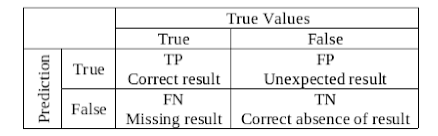

Terlihat dari matrik confusion (Training_cm), Nilai dari 
- TP bernilai 397 data
- FP bernilai 2 data
- FN bernila 0 data
- TN bernilai 421 data

In [28]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9975609756097561
Specificity training 1.0
Sensitivity training 0.9949874686716792
Precision training 1.0
F1 Score training 0.9974874371859296


- Nilai accuracy dapat dicari dengan menggunakan rumus = (tp+tn)/(tp+tn+fp+fn)
- Nilai specificity dapat dicari dengan menggunakan rumus = tn/(tn+fp)
- Nilai sensitivity dapat dicari dengan menggunakan rumus = tp/(tp+fn)
- Nilai precision dapat dicari dengan menggunakan rumus = tp/(tp+fp)
- Nilai f1_score dapat dicari dengan menggunakan rumus = (2 * Sensitivity*precision)/(sensitivity+precision)

In [29]:
testing_cm

array([[ 98,   2],
       [  0, 105]], dtype=int64)

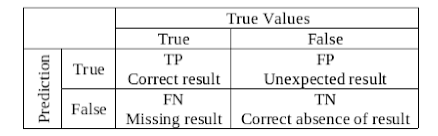

Terlihat dari matrik confusion (Training_cm), Nilai dari 
- TP bernilai 98 data
- FP bernilai 2 data
- FN bernila 0 data
- TN bernilai 105 data

In [30]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9902439024390244
Specificity testing 1.0
Sensitivity testing 0.98
Precision testing 1.0
F1 Score testing 0.98989898989899


- Nilai accuracy dapat dicari dengan menggunakan rumus = (tp+tn)/(tp+tn+fp+fn)
- Nilai specificity dapat dicari dengan menggunakan rumus = tn/(tn+fp)
- Nilai sensitivity dapat dicari dengan menggunakan rumus = tp/(tp+fn)
- Nilai precision dapat dicari dengan menggunakan rumus = tp/(tp+fp)
- Nilai f1_score dapat dicari dengan menggunakan rumus = (2 * Sensitivity*precision)/(sensitivity+precision)

# Kesimpulan 
Berdasarkan hasil percobaan yang kita peroleh, dapat disimpulkan bahwa dataset Penyakit jantung yang diperoleh dari website kaggle memiliki jumlah data sebanyak 1025 dan mendapatkan akurasi training 99% dan akurasi testing sebesar 99 % dengan menggunakan Artificial Neural Network.

# Referensi 
- Paper : ALGORITMA NEURAL NETWORK UNTUK PREDIKSI PENYAKIT JANTUNG
- dataset : https://www.kaggle.com/ronitf/heart-disease-uci    